In [30]:
import pandas as pd
import scipy.stats as stats

df = pd.read_csv('World_University_Ranking.csv')
df.head()


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


<Figure size 1000x600 with 0 Axes>

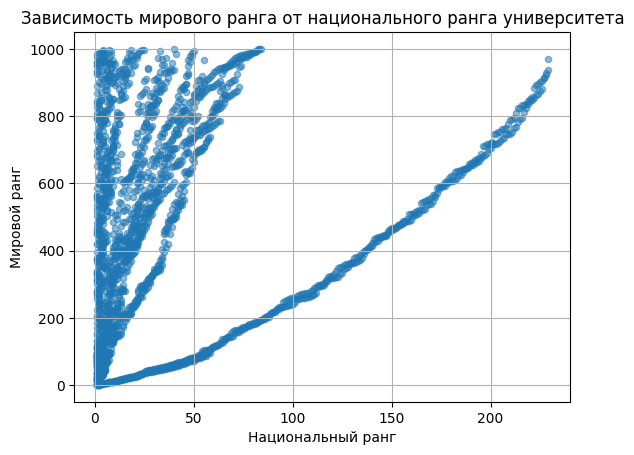

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
df.plot.scatter(x='national_rank', y='world_rank', alpha=0.5)
plt.title('Зависимость мирового ранга от национального ранга университета')
plt.xlabel('Национальный ранг')
plt.ylabel('Мировой ранг')
plt.grid(True)

<Figure size 1000x600 with 0 Axes>

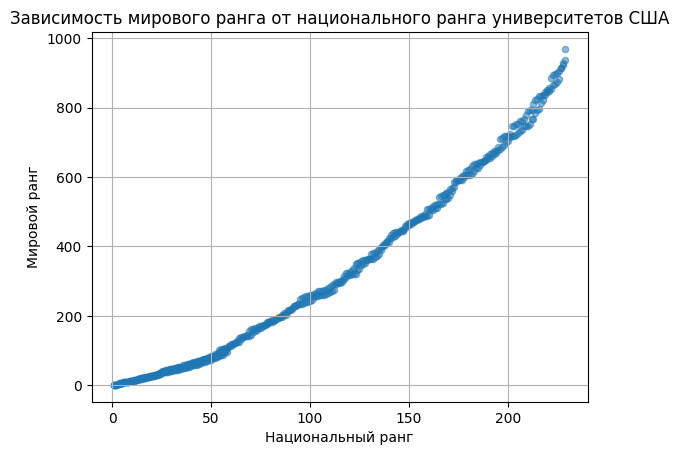

In [32]:
filtered_df = df[df['country'] == 'USA']
plt.figure(figsize=(10, 6))
filtered_df.plot.scatter(x='national_rank', y='world_rank', alpha=0.5)
plt.title('Зависимость мирового ранга от национального ранга университетов США')
plt.xlabel('Национальный ранг')
plt.ylabel('Мировой ранг')
plt.grid(True)

In [48]:
import plotly.express as px

filtered_df = df[(df['world_rank'] < 200) & (df['national_rank'] < 50)]

fig = px.scatter(filtered_df, x='national_rank', y='world_rank', 
                 title='Зависимость мирового ранга от национального ранга университетов, где мировой рейтинг меньше 200, а нац. рейтинг меньше 50',
                 labels={'national_rank': 'Национальный ранг', 'world_rank': 'Мировой ранг'},
                 hover_name='institution', 
                 hover_data={'institution': True, 'national_rank': True, 'world_rank': True}) 
fig.show()



In [34]:
import plotly.graph_objects as go

# Отфильтруем данные
filtered_df = df[df['country'] == 'USA'].head(15)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=filtered_df['national_rank'],
    y=filtered_df['world_rank'],
    mode='markers',
    marker=dict(color='skyblue', opacity=0.5),
    text=filtered_df['institution'], 
    hoverinfo='text'  
))
fig.add_trace(go.Scatter(
    x=filtered_df['national_rank'],
    y=filtered_df['world_rank'],
    mode='lines',
    line=dict(color='black', width=1),
    showlegend=False 
))
fig.update_layout(
    title='Зависимость мирового ранга от национального ранга топ 15 университетов США',
    xaxis=dict(title='Национальный ранг'),
    yaxis=dict(title='Мировой ранг', autorange="reversed"),
    height=600,
    width=800
)



<Figure size 1000x600 with 0 Axes>

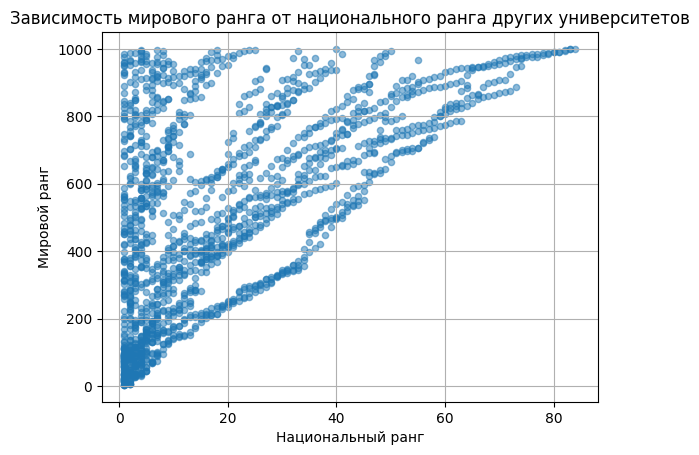

In [35]:
filtered_df = df[df['country'] != 'USA']
plt.figure(figsize=(10, 6))
filtered_df.plot.scatter(x='national_rank', y='world_rank', alpha=0.5)
plt.title('Зависимость мирового ранга от национального ранга других университетов')
plt.xlabel('Национальный ранг')
plt.ylabel('Мировой ранг')
plt.grid(True)

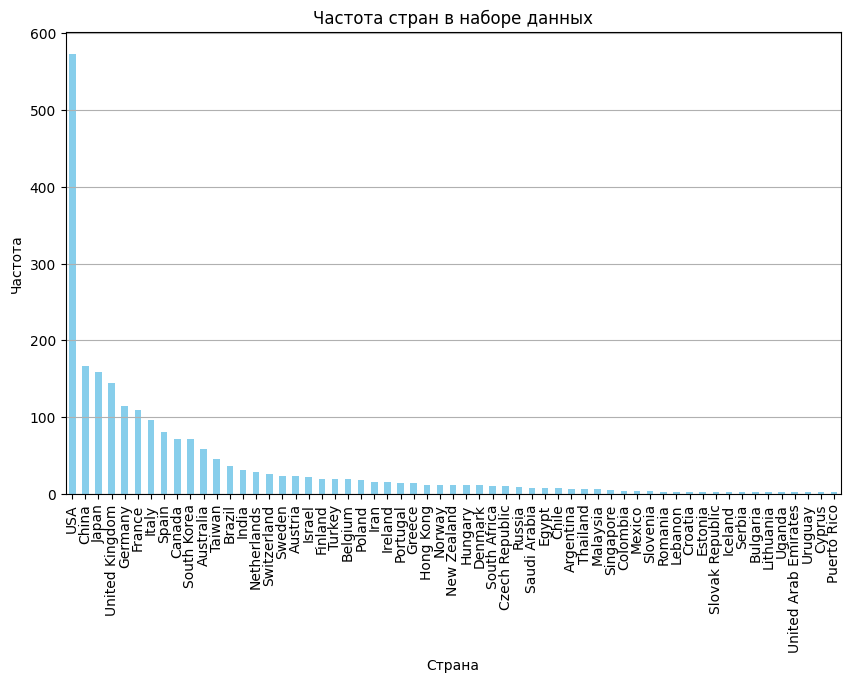

In [36]:
plt.figure(figsize=(10, 6))
df['country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Частота стран в наборе данных')
plt.xlabel('Страна')
plt.ylabel('Частота')
plt.xticks(rotation=90)
plt.grid(axis='y')

Для университетов США взаимосвзяь между национальным и мировым рейтингами сильная положительная, то есть с увеличением национального рейтинга увеличивается и мировой рейтинг

Однако для других стран не все так однозначно, у некотрых вузов связь действительно сильная. Возможно это связано с малым количеством университетов в датасете


# Влияет ли количество публикаций на общий рейтинг (world_rank)?

In [37]:
correlation_publications_rank = df['publications'].corr(df['world_rank'])
print(f'Корреляция между рейтингом публикаций и мировым рейтингом: {correlation_publications_rank}')


Корреляция между рейтингом публикаций и мировым рейтингом: 0.9230370551193191


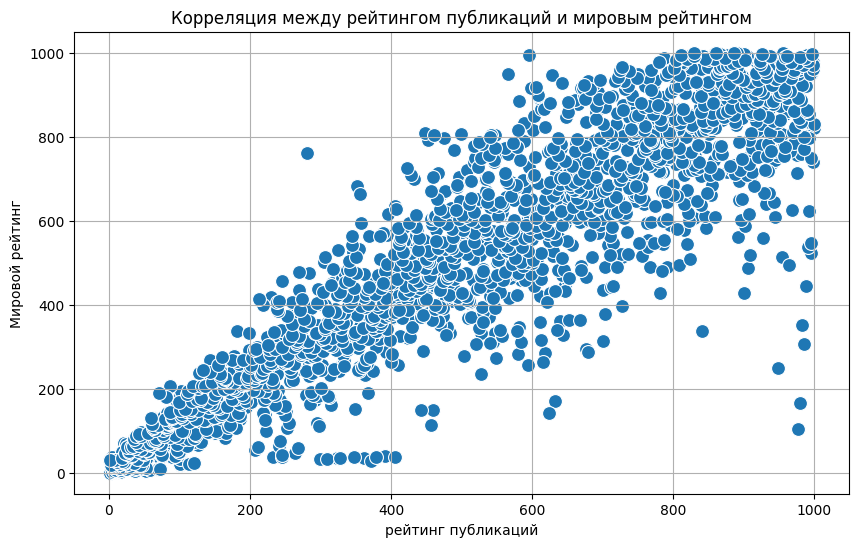

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publications', y='world_rank', data=df, s=100)
plt.title('Корреляция между рейтингом публикаций и мировым рейтингом')
plt.xlabel('рейтинг публикаций')
plt.ylabel('Мировой рейтинг')
plt.grid(True)

In [39]:
import plotly.express as px

fig = px.scatter(df, x='publications', y='world_rank', 
                 title='Корреляция между рейтингом публикаций и мировым рейтингом',
                 labels={'publications':'рейтинг публикаций', 'world_rank':'Мировой рейтинг'},
                 size='publications', hover_data=['institution'], hover_name='institution')
fig.show()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = filtered_df[['publications']]
y = filtered_df['world_rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


R^2 Score: 0.8180517149976376


Как видно из графика и корреляционного коэффицента количество публикации очень сильно влияет на мировой рейтинг

# Влияет ли качество образования на мировым рейтингом?

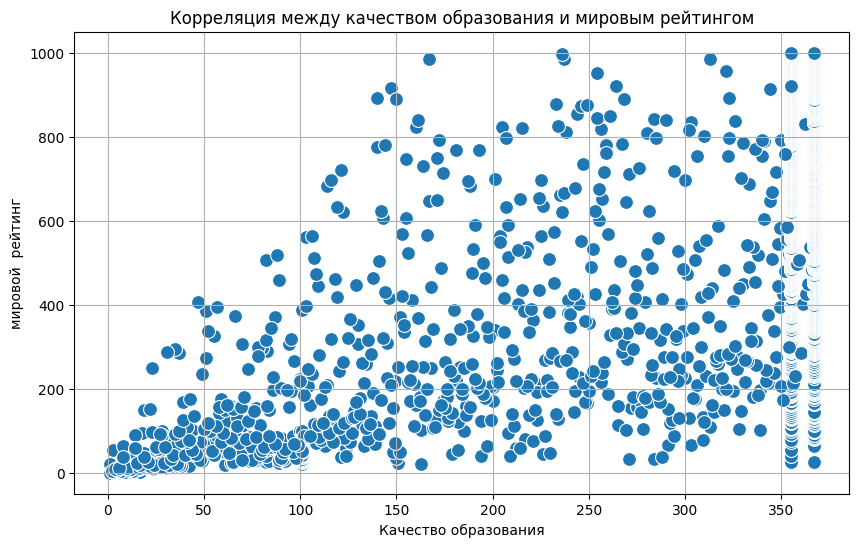

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quality_of_education', y='world_rank', data=df, s=100)
plt.title('Корреляция между качеством образования и мировым рейтингом')
plt.xlabel('Качество образования')
plt.ylabel('мировой  рейтинг')
plt.grid(True)
plt.show()

In [42]:

correlation_education_patents = df['quality_of_education'].corr(df['world_rank'])
f'Корреляция между качеством образования и количеством патентов: {correlation_education_patents}'

'Корреляция между качеством образования и количеством патентов: 0.6761658238783759'

хоть и коэффицент корреляции 0.69. Это говорит о том, что  качество оброзования влияет неоднозначно на мировой рейтинг

Судя по графике качество образования влияет на количество патентов не однозначно

# Влияет ли количество патентов на общий рейтинг?

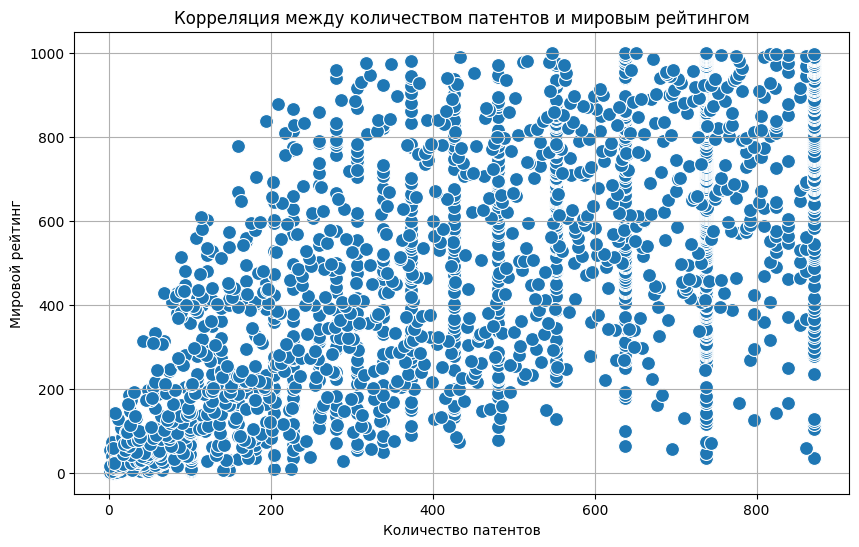

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='patents', y='world_rank', data=df, s=100)
plt.title('Корреляция между количеством патентов и мировым рейтингом')
plt.xlabel('Количество патентов')
plt.ylabel('Мировой рейтинг')
plt.grid(True)
plt.show()

In [44]:
correlation_patents_rank = df['patents'].corr(df['world_rank'])
print(f'Корреляция между количеством патентов и мировым рейтингом: {correlation_patents_rank}')


Корреляция между количеством патентов и мировым рейтингом: 0.6982138508766138


Как видно из графика между количеством патентов и мировым рейтингом слабая положительная связь, хоть и коэффицент корреляции 0.69. Это говорит о том, что Количество патентов влияет неоднозначно на мировой рейтинг